<a href="https://colab.research.google.com/github/HEMA1188/Assignment_11_12_13_14_15/blob/main/Copy_of_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [14]:

import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
df=pd.concat([df,gender], axis=1)
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Male'], dtype='object')

In [6]:
X=df[['Age','Male','EstimatedSalary']]
Y=df['Purchased']

In [8]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

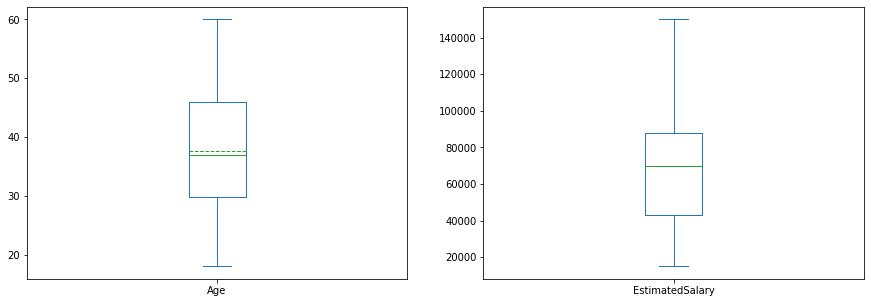

In [9]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
df['Age'].plot.box(ax = ax[0], showmeans = True, meanline = True)
df['EstimatedSalary'].plot.box(ax = ax[1], showmeans = True, meanline = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb6b41c610>,
      dtype=object)

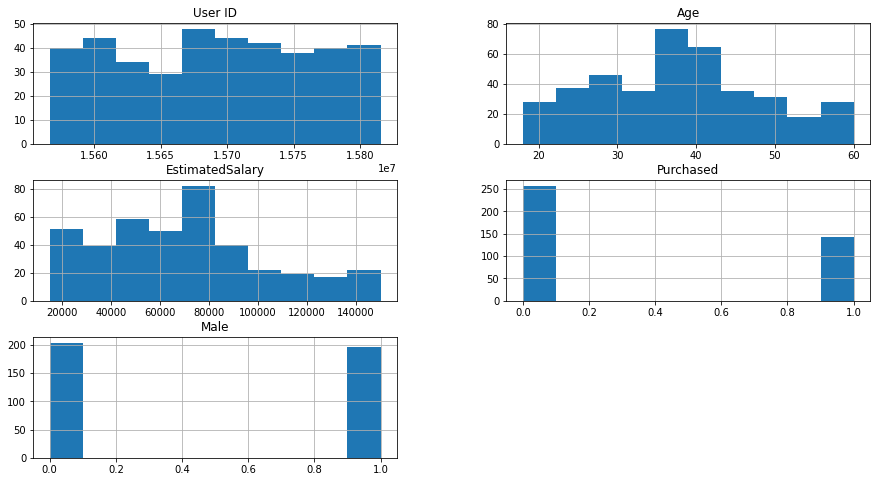

In [10]:
df.hist(figsize = (15, 8))

**Splitting the dataset into the Training set and Test set**

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [33]:
DTC=DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [34]:
pred=DTC.predict(x_test)

**Making the Confusion Matrix**

In [35]:
confus=confusion_matrix(y_test,pred)
print(confus)

[[71  8]
 [ 4 37]]


**Visualising the Training set results**

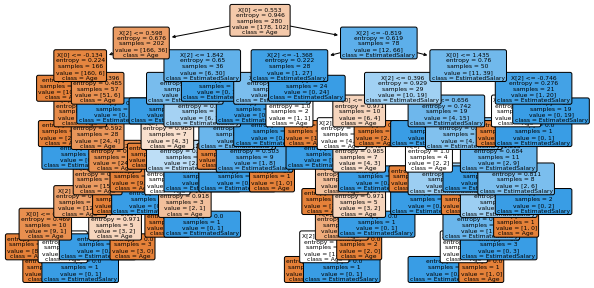

In [36]:
plt.figure(figsize=(10,5))
tree.plot_tree(DTC,class_names=X.columns, rounded=True,filled=True, fontsize=6)
plt.show()

In [37]:
pred_train=DTC.predict(x_train)
print("Testing Accuarcy" , accuracy_score(y_test,pred))
print("Training Accuarcy", accuracy_score(y_train,pred_train))

Testing Accuarcy 0.9
Training Accuarcy 1.0


In [38]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.500,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0


In [39]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased', 'Male'], dtype='object')

In [40]:
X.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

**Visualising the Test set results**

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, DTC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
